In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
df_oh_encoded = pd.read_csv(r"data\df_oh_encoded.csv")
df_oh_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previous_contact
0,31,35.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,True,False,False,True,False,0
1,39,29.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,True,False,False,True,False,0
2,25,29.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,True,False,False,True,False,0
3,29,27.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,False,False,False,False,False,False,False,True,False,0
4,41,24.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,False,False,False,False,False,False,False,True,False,0


In [ ]:
X = df_oh_encoded.drop("y", axis=1)
y = df_oh_encoded["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

columns_to_skip_scaling = X_train.iloc[:,10:].columns

X_train_oh = X_train[columns_to_skip_scaling].to_numpy()
X_test_oh = X_test[columns_to_skip_scaling].to_numpy()

X_train_to_scale = X_train.drop(columns_to_skip_scaling, axis=1)
X_test_to_scale = X_test.drop(columns_to_skip_scaling, axis=1)

X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

X_train_scaled=np.hstack((X_train_scaled,X_train_oh))
X_test_scaled=np.hstack((X_test_scaled,X_test_oh))

###  Kreiranje klaster modela i odredjivanje klastera svake instance

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,max_iter=100)

In [ ]:
cluster_model = kmeans.fit(df_oh_encoded)
centers = cluster_model.cluster_centers_
clusters = cluster_model.predict(df_oh_encoded)
df_oh_encoded['Cluster'] = clusters

In [ ]:
df_oh_encoded.head(25)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previous_contact,Cluster
0,31,35.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
1,39,29.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
2,25,29.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
3,29,27.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,24.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,1,0,0,0
5,29,23.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
6,45,23.0,999,0.0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,0,1,0,0,0,1,0,0,0
7,43,22.0,999,0.0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,0,1,0,0,0,1,0,0,0
8,31,22.0,999,0.0,1.1,93.994,-36.4,4.860,5191.0,0,...,0,0,0,1,0,0,1,0,0,0
9,56,19.0,999,0.0,1.4,93.918,-42.7,4.960,5228.1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_oh_encoded['Cluster'].value_counts()

0    2771
2    1188
1     160
Name: Cluster, dtype: int64

In [ ]:
df_oh_encoded[df_oh_encoded['Cluster']==0]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previous_contact,Cluster
0,31,35.000000,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
1,39,29.000000,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
2,25,29.000000,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,1,0,0,1,0,0,0
3,29,27.000000,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,24.000000,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,53,2.534273,999,0.0,1.1,93.994,-36.4,4.860,5191.0,0,...,0,0,0,1,0,0,1,0,0,0
4115,30,2.534273,999,0.0,1.1,93.994,-36.4,4.858,5191.0,0,...,0,0,0,0,0,1,1,0,0,0
4116,31,2.534273,999,0.0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,1,0,0,0,1,0,0,0
4117,47,2.534273,999,0.0,1.1,93.994,-36.4,4.856,5191.0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
df_oh_encoded[df_oh_encoded['Cluster']==1]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previous_contact,Cluster
203,41,7.0,6,3.0,-1.7,94.215,-40.3,0.896,4991.6,0,...,0,0,0,0,0,0,0,1,1,1
235,50,6.0,3,1.0,-1.8,92.893,-46.2,1.354,5099.1,1,...,0,0,1,0,0,0,0,1,1,1
301,47,6.0,6,1.0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,0,0,0,0,0,1,1,1
340,30,5.0,10,2.0,-1.8,92.843,-50.0,1.640,5099.1,1,...,0,0,0,0,0,0,0,0,1,1
349,42,5.0,10,1.0,-1.8,92.893,-46.2,1.344,5099.1,0,...,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,24,1.0,17,4.0,-1.1,94.199,-37.5,0.886,4963.6,0,...,0,1,0,0,0,1,0,0,1,1
3891,35,1.0,13,2.0,-1.7,94.055,-39.8,0.739,4991.6,0,...,0,0,0,0,0,1,0,0,1,1
3924,43,1.0,6,2.0,-2.9,92.201,-31.4,0.869,5076.2,0,...,0,0,0,0,0,0,0,0,1,1
4093,70,1.0,14,3.0,-1.1,94.601,-49.5,0.965,4963.6,0,...,1,0,0,1,0,0,0,0,1,1


In [ ]:
df_oh_encoded[df_oh_encoded['Cluster']==2]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previous_contact,Cluster
56,32,12.0,999,0.0,-1.8,92.893,-46.2,1.266,5099.1,0,...,0,0,0,1,0,0,1,0,0,2
72,34,11.0,999,0.0,-1.8,92.893,-46.2,1.327,5099.1,0,...,0,0,0,1,0,0,1,0,0,2
85,30,11.0,999,0.0,-1.8,92.893,-46.2,1.250,5099.1,0,...,0,0,0,0,0,0,1,0,0,2
89,29,10.0,999,0.0,-1.8,92.893,-46.2,1.250,5099.1,0,...,0,0,0,0,0,0,1,0,0,2
113,29,9.0,999,1.0,-1.8,92.893,-46.2,1.250,5099.1,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,27,1.0,999,0.0,-1.8,92.893,-46.2,1.266,5099.1,0,...,0,0,0,0,1,0,1,0,0,2
4094,32,1.0,999,1.0,-1.8,92.893,-46.2,1.250,5099.1,0,...,0,0,0,0,0,0,0,0,0,2
4103,41,1.0,999,0.0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,0,1,0,0,2
4106,63,1.0,999,0.0,-3.4,92.431,-26.9,0.740,5017.5,0,...,1,0,0,0,0,1,1,0,0,2


In [ ]:
# Prikaz drveta za lakse shvatanje kriterijuma klasterovanja
X = df_oh_encoded.drop(["y","Cluster"], axis=1)
y = df_oh_encoded["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

columns_to_skip_scaling = X_train.iloc[:,10:].columns

X_train_oh = X_train[columns_to_skip_scaling].to_numpy()
X_test_oh = X_test[columns_to_skip_scaling].to_numpy()

X_train_to_scale = X_train.drop(columns_to_skip_scaling, axis=1)
X_test_to_scale = X_test.drop(columns_to_skip_scaling, axis=1)

X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

X_train_scaled=np.hstack((X_train_scaled,X_train_oh))
X_test_scaled=np.hstack((X_test_scaled,X_test_oh))

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_preds = dt_classifier.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)
dt_report = classification_report(y_test, dt_preds)
print("Decision Tree Classification Report:")
print(dt_report)

importance = dt_classifier.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame(list(zip(feature_names, importance)), columns=["Feature", "Importance"])
print(feature_importance)

X_train_scaled[51]

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00       236

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

                          Feature  Importance
0                             age    0.000000
1                        campaign    0.000000
2                           pdays    0.144575
3                        previous    0.000000
4                    emp.var.rate    0.000000
5                  cons.price.idx    0.000000
6                   cons.conf.idx    0.000000
7                       euribor3m    0.848898
8                     nr.employed    0.000000
9                 job_blue-collar    0.000000
10               job_entrepreneur    0.000000
11

array([-0.39643277,  0.20676173,  0.20266635, -0.35790112,  0.84632055,
        0.59266802, -0.48371524,  0.77447222,  0.84469534,  1.90127482,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ])

[Text(0.5, 0.8333333333333334, 'X[7] <= -0.603\ngini = 0.464\nsamples = 3295\nvalue = [2213, 130, 952]'),
 Text(0.25, 0.5, 'X[2] <= -2.327\ngini = 0.205\nsamples = 1077\nvalue = [0, 125, 952]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 125\nvalue = [0, 125, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 952\nvalue = [0, 0, 952]'),
 Text(0.75, 0.5, 'X[51] <= 0.5\ngini = 0.004\nsamples = 2218\nvalue = [2213, 5, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2213\nvalue = [2213, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]')]

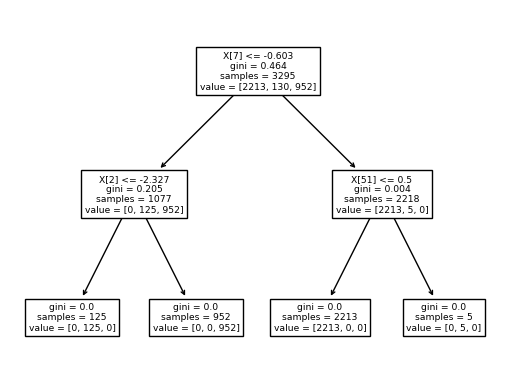

In [ ]:
from sklearn import tree
tree.plot_tree(dt_classifier)

In [ ]:
print("X[7]:", X_test.columns[7])
print("X[2]:", X_test.columns[2])
print("X[51]:", X_test.columns[51])

X[7]: euribor3m
X[2]: pdays
X[51]: poutcome_success


###  Okarakterisati dobijene klastere
1. Nizak euribor i visok poutcome_success predstavlja 1. klaster, **Lojalni**
2. Visok euribor i visok pdays ili nizak euribor i nizak poutcome_success predstavlja 2. klaster, **Zaboravljeni/Izgubljeni**
3. Visok euribor i nizak pdays predstavlja 3. klaster, **Potencijalni**

###  Ocena kvaliteta klaster modela

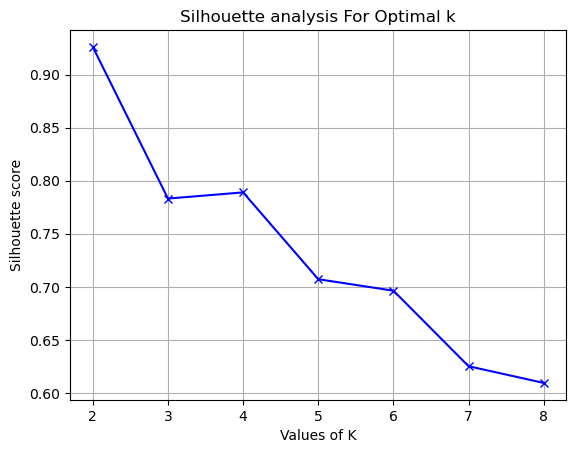

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_oh_encoded)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df_oh_encoded, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.grid(True)
plt.show()

###  Najbolji broj klastera

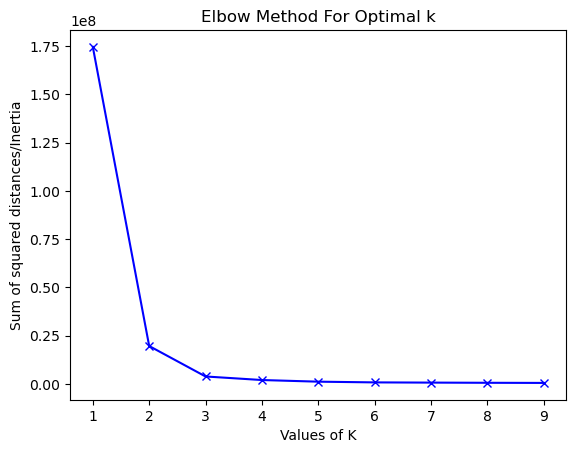

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_oh_encoded)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

### Podela dataseta po klasterima i ponovna klasifikacija

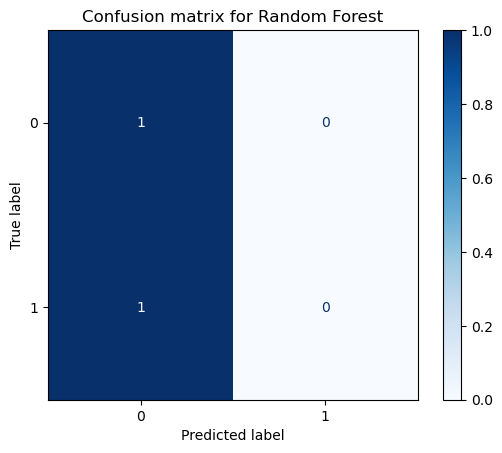

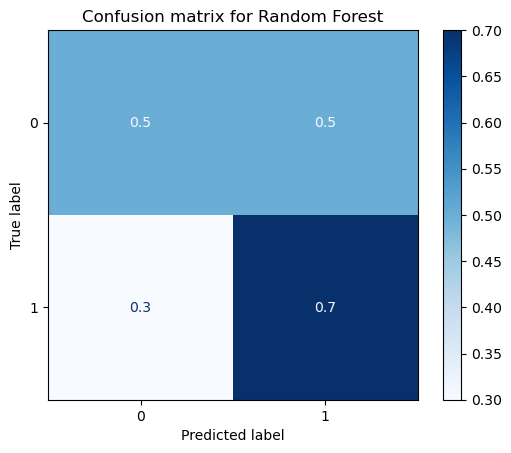

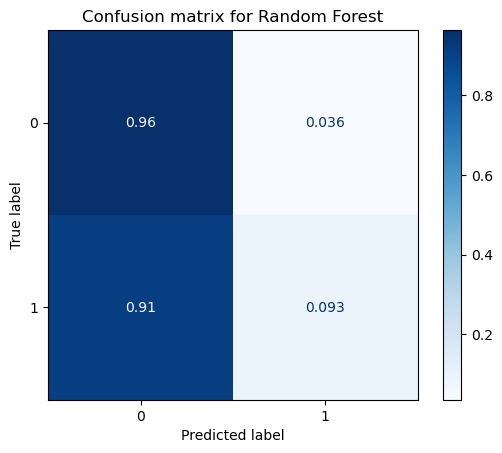

In [ ]:
for cluster in [0, 1, 2]:
    df_cluster = df_oh_encoded[df_oh_encoded["Cluster"] == cluster]
    X = df_cluster.drop("y", axis=1)
    X = X.drop("Cluster", axis=1)
    y = df_cluster["y"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()

    columns_to_skip_scaling = X_train.iloc[:,10:].columns

    X_train_oh = X_train[columns_to_skip_scaling].to_numpy()
    X_test_oh = X_test[columns_to_skip_scaling].to_numpy()

    X_train_to_scale = X_train.drop(columns_to_skip_scaling, axis=1)
    X_test_to_scale = X_test.drop(columns_to_skip_scaling, axis=1)

    X_train_scaled = scaler.fit_transform(X_train_to_scale)
    X_test_scaled = scaler.transform(X_test_to_scale)

    X_train_scaled=np.hstack((X_train_scaled,X_train_oh))
    X_test_scaled=np.hstack((X_test_scaled,X_test_oh))

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)
    rf_preds = rf_classifier.predict(X_test_scaled)

    matrix = plot_confusion_matrix(rf_classifier, X_test_scaled, y_test,
                                    cmap=plt.cm.Blues,
                                    normalize='true')
    plt.title('Confusion matrix for Random Forest')
    plt.show(matrix)